In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, solve
from matplotlib.patches import Circle

plt.style.use("ggplot")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

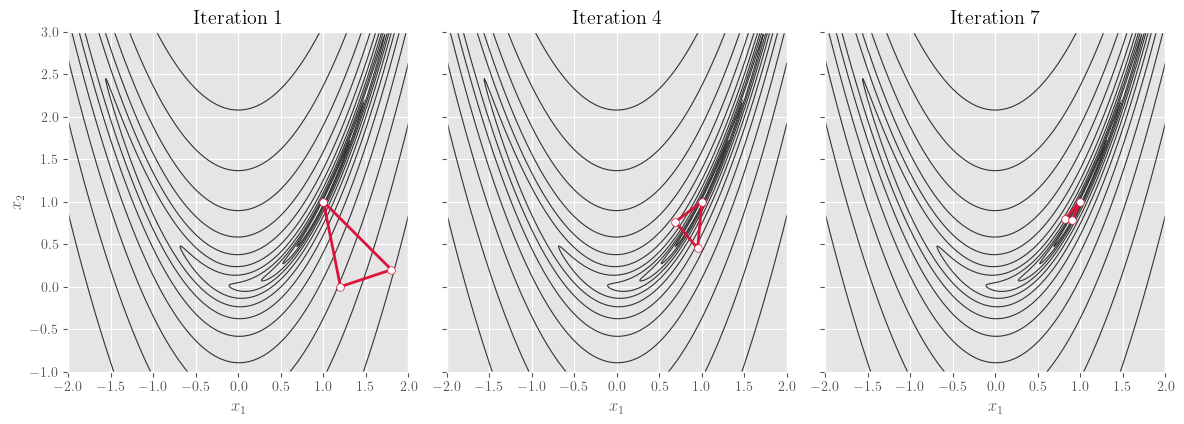

In [ ]:
def rosenbrock(x):
    x1, x2 = x
    return (1 - x1)**2 + 100.0 * (x2 - x1**2)**2

def nelder_mead(simplex0, n_iters, alpha=1.0, gamma=2.0, rho=0.5, sigma=0.5):
    """
    simplex0: (3,2) array of starting vertices
    returns: list of simplexes at each iteration (including the start),
             and a list of the operations taken.
    """
    s = simplex0.astype(float).copy()
    trail = [s.copy()]
    ops = []

    for _ in range(n_iters):
        f = np.array([rosenbrock(v) for v in s])
        order = np.argsort(f)           # sort: best, good, worst
        s = s[order]
        f = f[order]
        x0, x1, x2 = s
        c = 0.5 * (x0 + x1)             # centroid of best two

        # Reflection
        xr = c + alpha * (c - x2)
        fr = rosenbrock(xr)

        if f[0] <= fr < f[1]:
            s[2] = xr; ops.append("reflect")
        elif fr < f[0]:
            # Expansion
            xe = c + gamma * (xr - c)
            fe = rosenbrock(xe)
            if fe < fr:
                s[2] = xe; ops.append("expand")
            else:
                s[2] = xr; ops.append("reflect")
        else:
            # Contraction
            if fr < f[2]:
                xoc = c + rho * (xr - c)      # outside
                foc = rosenbrock(xoc)
                if foc <= fr:
                    s[2] = xoc; ops.append("contract (outside)")
                else:
                    # shrink
                    s[1] = x0 + sigma * (x1 - x0)
                    s[2] = x0 + sigma * (x2 - x0)
                    ops.append("shrink")
            else:
                xic = c - rho * (xr - c)      # inside
                fic = rosenbrock(xic)
                if fic < f[2]:
                    s[2] = xic; ops.append("contract (inside)")
                else:
                    s[1] = x0 + sigma * (x1 - x0)
                    s[2] = x0 + sigma * (x2 - x0)
                    ops.append("shrink")

        trail.append(s.copy())

    return trail, ops

def draw_simplex(ax, tri, color="crimson", lw=2.0):
    poly = np.vstack([tri, tri[0]])
    ax.plot(poly[:,0], poly[:,1], color=color, lw=lw)
    ax.scatter(tri[:,0], tri[:,1], s=30, facecolor="white", edgecolor=color, zorder=3)

def plot_three_iterations(simplexes, start_iter=0):
    x1 = np.linspace(-2.0, 2.0, 400)
    x2 = np.linspace(-1.0, 3.0, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = (1 - X1)**2 + 100.0 * (X2 - X1**2)**2
    levels = np.logspace(-1, 3, 12)

    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
    for j, ax in enumerate(axs):
        j *= 3
        ax.contour(X1, X2, Z, levels=levels, colors="0.2", linewidths=0.8)
        tri = simplexes[start_iter + j]
        draw_simplex(ax, tri)
        ax.set_title(f"Iteration {start_iter + j + 1}")
        ax.set_xlim(-2, 2)
        ax.set_ylim(-1, 3)
        ax.set_xlabel(r"$x_1$")
        ax.set_aspect("equal", adjustable="box")
    axs[0].set_ylabel(r"$x_2$")
    fig.tight_layout()
    return fig, axs

# a nice starting simplex near the Rosenbrock valley
simplex0 = np.array([
    [1.8, 0.2],
    [1.0, 1.0],
    [1.2, 0.0]
])

trail, ops = nelder_mead(simplex0, n_iters=25)

start_iter = 0

fig, axs = plot_three_iterations(trail, start_iter=start_iter)
plt.show()

fig.savefig("../../../figs/optimization/nelder_mead_3panel.pdf", bbox_inches="tight")